In [211]:
import plotly.express as px
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


In [212]:
file = r'Lab03_DHT11_CCS811\Lab03_DHT11_CCS811\data5.csv'


df = pd.read_csv(file)
df = df.dropna()
df = df.drop(columns=['Unnamed: 0'])
# #plot only from 10 to 20
# df = df[10:130]
#heat gun df = df[10:130] data 5.csv

display(df)

,humidity,temperature,CO2,TVOC,CCTEMP,time
0,47.0,25.8,438.0,5.0,25.8,0.870908
1,45.0,25.0,433.0,5.0,25.8,1.893039
2,45.0,25.0,423.0,3.0,25.8,2.860200
3,45.0,25.0,425.0,3.0,25.8,3.855630
4,44.0,25.0,427.0,4.0,25.8,4.872487
...,...,...,...,...,...,...
115,40.0,25.1,433.0,5.0,25.0,115.163976
116,40.0,25.1,433.0,5.0,25.0,116.129437
117,40.0,25.1,433.0,5.0,25.0,117.125084
118,40.0,25.9,433.0,5.0,25.0,118.145226


In [213]:
# #rename columns temperature and cc temp
df = df.rename(columns={'temperature': 'Temperature DHT11', 'CCTEMP': 'Temperature CCS811'})

In [214]:

# # temperature
# fig = px.line(df, x='time', y=['Temperature DHT11', 'Temperature CCS811'])
# fig.update_layout(
#     title="Temperature DHT11 and CCS811 sensor",
#     xaxis_title="Time [s]",
#     yaxis_title="Temperature [°C]",
#     legend_title="Series",
# )
# fig.show()
# #humidity
# fig = px.line(df, x='time', y=['humidity'])
# fig.update_layout(
#     title="Humidity DHT11 sensor",
#     xaxis_title="Time [s]",
#     yaxis_title="Humidity [%]",
#     legend_title="Series",
# )
# fig.show()
# #co2
# fig = px.line(df, x='time', y=['CO2'])
# fig.update_layout(
#     title="CO2 CCS811 sensor",
#     xaxis_title="Time [s]",
#     yaxis_title="CO2 [ppm]",
#     legend_title="Series",
# )
# fig.show()
# #tvoc
# fig = px.line(df, x='time', y=['TVOC'])
# fig.update_layout(
#     title="TVOC CCS811 sensor",
#     xaxis_title="Time [s]",
#     yaxis_title="TVOC [ppb]",
#     legend_title="Series",
# )

In [215]:
# temperature
fig = px.line(df, x='time', y=['Temperature DHT11'])
fig.update_layout(
    title="Temperature DHT11",
    xaxis_title="Time [s]",
    yaxis_title="Temperature [°C]",
)
fig.show()
#humidity
fig = px.line(df, x='time', y=['humidity'])
fig.update_layout(
    title="Humidity DHT11 sensor",
    xaxis_title="Time [s]",
    yaxis_title="Humidity [%]",
)



In [216]:
fig = px.line(df, x='time', y=['Temperature DHT11'])
fig.update_layout(
    title="Temperature DHT11",
    xaxis_title="Time [s]",
    yaxis_title="Temperature [°C]",
)
# #index max
max_temp = df['Temperature DHT11'].idxmax() + 2
print('max temp index: ', max_temp)
#index 5 sec after max
after_sec = 30
max_temp_after = max_temp + after_sec
print('max temp index + 5 sec: ', max_temp)
#show index in plot
fig.add_vline(x=max_temp, line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x=max_temp_after, line_width=3, line_dash="dash", line_color="red")
fig.show()


max temp index:  33
max temp index + 5 sec:  33


In [217]:
df_exp = df[max_temp:max_temp_after]
fig = px.line(df_exp, x='time', y=['Temperature DHT11'])
fig.update_layout(
    title="Temperature DHT11",
    xaxis_title="Time [s]",
    yaxis_title="Temperature [°C]",
)
fig.show()

In [218]:
#calculate exponential fit
#exponential formula
#t_final = room_temp + (t0 - room_temp) * np.exp(-t / t_const)
#(t_final - room_temp) / (t0 - room_temp) = np.exp(-t / t_const)
#ln((t_final - room_temp) / (t0 - room_temp)) = -t / t_const
#t_const = -t / ln((t_final - room_temp) / (t0 - room_temp))

room_temp = 25
t0 = df_exp['Temperature DHT11'].iloc[0]
t_final = df_exp['Temperature DHT11'].iloc[-1]
delta_t = df_exp['time'].iloc[-1] - df_exp['time'].iloc[0]
print('-------------------')
print('delta_t: ', delta_t)
print('t final: ', t_final)
print('room temp: ', room_temp)
print('t0: ', t0)
print('-------------------')

t_const = -delta_t / np.log((t_final - room_temp) / (t0 - room_temp))
t_first_calc = room_temp + (t0 - room_temp) 
t_final_calc = room_temp + (t0 - room_temp) * np.exp(-delta_t / t_const)

print('delta_t: ', delta_t)
print('t0: ', t0)
print('t_final: ', t_final)
print('t_const: ', t_const)
print('t_first_calc: ', t_first_calc)
print('t_final_calc: ', t_final_calc)
print('error: ', t_final - t_final_calc)

def exponential(delta_t, t0, t_const, room_temp):
    return room_temp + (t0 - room_temp) * np.exp(-delta_t / t_const)



df['exponential'] = exponential(df_exp['time'] - df_exp['time'].iloc[0], t0, t_const, room_temp)

def exponential2(t, t0, t_const, room_temp):
    return t0 * np.exp(-t / t_const)
#calculate exponential fit
t_const = 300.0

df['exponential_2'] = exponential2(df_exp['time'] - df_exp['time'].iloc[0], t0, t_const, room_temp)
#extend exponential fit to whole data
#plot exponential fit
fig = px.line(df, x='time', y=['Temperature DHT11', 'exponential', 'exponential_2'])
fig.update_layout(
    title="Temperature DHT11",
    xaxis_title="Time [s]",
    yaxis_title="Temperature [°C]",
    # yaxis_type="log",
)
fig.add_vline(x=max_temp, line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x=max_temp_after, line_width=3, line_dash="dash", line_color="red")
# df.to_excel('data5_exp_fit_temp.xlsx')
# df.to_csv('data5_exp_fit_temp.csv')

-------------------
delta_t:  28.81369137763977
t final:  26.1
room temp:  25
t0:  28.4
-------------------
delta_t:  28.81369137763977
t0:  28.4
t_final:  26.1
t_const:  25.533521152933343
t_first_calc:  28.4
t_final_calc:  26.1
error:  0.0


with the exponential decay equation:
$$ t(t) = t_{room} + (t_0 - t_{room})e^{-\frac{t}{t_{const}}} $$
we can solve for the time constant $t_{const}$:

$$ t_{const} = -\frac{\Delta t}{\ln{\frac{t_{final} - t_{room}}{t_0 - t_{room}}}} $$

with the following values:

```python
delta_t:  28.81369137763977
t_final:  26.1
t0:  28.4
room_temp = 20.0
t_const = -delta_t / np.log((t_final - room_temp) / (t0 - room_temp))
```

we get $t_{const} =  25.533$.

In [ ]:
Certainly! Here's the LaTeX representation of Newton's Law of Cooling as a function of time:



In this equation, \( T(t) \) represents the temperature at time \( t \), \( T_{\text{{ambient}}} \) represents the ambient temperature, \( T_0 \) represents the initial temperature at time \( t_0 \), \( k \) represents the cooling constant, and \( t \) represents the time at which you want to calculate the temperature.

In [219]:
fig = px.line(df, x='time', y=['humidity'])
fig.update_layout(
    title="Temperature DHT11",
    xaxis_title="Time [s]",
    yaxis_title="Temperature [°C]",
)
# #index max
max_humidity = df['humidity'].idxmax() + 53
print('max temp index: ', max_humidity)
#index 5 sec after max
after_sec = 50
max_humidity_after = max_humidity + after_sec
print('max temp index + 5 sec: ', max_humidity_after)
#show index in plot
fig.add_vline(x=max_humidity, line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x=max_humidity_after, line_width=3, line_dash="dash", line_color="red")
fig.show()

max temp index:  63
max temp index + 5 sec:  113


In [220]:
df_exp = df[max_humidity:max_humidity_after]
fig = px.line(df_exp, x='time', y=['humidity'])
fig.update_layout(
    title="Humidity DHT11",
    xaxis_title="Time [s]",
    yaxis_title="Humidity [%]",
)
fig.show()

In [221]:
#calculate exponential fit
room_humidity = 40
t0 = df_exp['humidity'].iloc[0]
t_final = df_exp['humidity'].iloc[-1]
delta_t = df_exp['time'].iloc[-1] - df_exp['time'].iloc[0]
t_const = -delta_t / np.log((t_final - room_humidity) / (t0 - room_humidity))
t_first_calc = room_humidity + (t0 - room_humidity)
t_final_calc = room_humidity + (t0 - room_humidity) * np.exp(-delta_t / t_const)

print('delta_t: ', delta_t)
print('t0: ', t0)
print('t_final: ', t_final)
print('t_const: ', t_const)
print('t_first_calc: ', t_first_calc)
print('t_final_calc: ', t_final_calc)
print('error: ', t_final - t_final_calc)

def exponential(delta_t, t0, t_const, room_humidity):
    return room_humidity + (t0 - room_humidity) * np.exp(-delta_t / t_const)

def exponential2(t, t0, t_const, room_humidity):
    return t0 * np.exp(-t / t_const)



#calculate exponential fit
df['exponential'] = exponential(df_exp['time'] - df_exp['time'].iloc[0], t0, t_const, room_humidity)
t_const = 50.0
df['exponential_2'] = exponential2(df_exp['time'] - df_exp['time'].iloc[0], t0, t_const, room_humidity)
#extend exponential fit to whole data
#plot exponential fit
fig = px.line(df, x='time', y=['humidity', 'exponential', 'exponential_2'])

tick_vals = np.arange(0.0, 110.0, 10.0)

fig.update_layout(
    title="Humidity DHT11",
    xaxis_title="Time [s]",
    yaxis_title="Humidity [%]",
    yaxis=dict(
        tickmode='array',
        tickvals=tick_vals,
        tickformat=".1f"
    ),
    #set log scale
    yaxis_type="log",
)
fig.add_vline(x=max_humidity, line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x=max_humidity_after, line_width=3, line_dash="dash", line_color="red")
#show from 10 to 1
fig.show()

delta_t:  48.71683859825134
t0:  95.0
t_final:  41.0
t_const:  12.156922408593088
t_first_calc:  95.0
t_final_calc:  41.0
error:  0.0


with the exponential decay equation:
$$ h(t) = h_{room} + (h_0 - h_{room})e^{-\frac{t}{t_{const}}} $$
we can solve for the time constant $t_{const}$:
$$ t_{const} = -\frac{\Delta t}{\ln{\frac{h_{final} - h_{room}}{h_0 - h_{room}}}} $$
```python
delta_t:  48.71683859825134
h0 =  95.0
h_final:  41.0
room_hum = 40.0
t_const = -delta_t / np.log((h_final - room_hum) / (h0 - room_hum))
```
we get $t_{const} =  12.156922408593088$.

In [222]:
#show normalised data 
max_humidity = df['humidity'].idxmax()
#normalise data
df['humidity_norm'] = df['humidity'] / df['humidity'].iloc[max_humidity]
fig = px.line(df, x='time', y=['humidity_norm'])
fig.update_layout(
    title="Humidity DHT11",
    xaxis_title="Time [s]",
    yaxis_title="Norm. Humidity [%]",
    yaxis=dict(
        tickmode='array',
        tickvals=tick_vals,
        tickformat=".1f"
    ),
    yaxis_type="log",
)

fig.add_vline(x=max_humidity, line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x=max_humidity_after, line_width=3, line_dash="dash", line_color="red")
fig.show()

In [223]:
# # df = df[31:120]
# # temperature
# fig = px.line(df, x='time', y=['Temperature DHT11'])
# fig.update_layout(
#     title="Temperature DHT11",
#     xaxis_title="Time [s]",
#     yaxis_title="Temperature [°C]",
# )
# fig.show()
# #humidity
# fig = px.line(df, x='time', y=['humidity'])
# fig.update_layout(
#     title="Humidity DHT11 sensor",
#     xaxis_title="Time [s]",
#     yaxis_title="Humidity [%]",
# )
# fig.show()
# #plot with matplotlib
# #temperature
# plt.plot(df['time'], df['Temperature DHT11'], label='Temperature DHT11')
# plt.xlabel('Time [s]')
# plt.ylabel('Temperature [°C]')
# plt.title('Temperature DHT11 sensor')
# plt.legend()
# #SET TO LOG 2 Y AXIS
# plt.yscale('log')
# plt.show()
# #humidity
# plt.plot(df['time'], df['humidity'], label='Humidity DHT11')
# plt.xlabel('Time [s]')
# plt.ylabel('Humidity [%]')
# plt.yscale('log')
# plt.title('Humidity DHT11 sensor')
# plt.legend()

# plt.show()

In [224]:
# display(df)

In [225]:
# start_index = 31
# end_index = 50


# def time_constant(df, column, start, end):
#     df = df[start:end]
#     df = df.reset_index(drop=True)
#     #calculate time constant
#     #find max

In [226]:

# t_const = 22.94

# def exp_func(room_temp, t_const, t, t0):
#     return room_temp + (t0 - room_temp) * np.exp(-t / t_const)

# #calculate t0
# t0 = df['Temperature DHT11'].max()
# df['exp'] = exp_func(25, t_const, df['time'], 33.66)

# df = df[31:120]

# fig = px.line(df, x='time', y=['Temperature DHT11', 'exp'])
# fig.update_layout(
#     title="Temperature DHT11",
#     xaxis_title="Time [s]",
#     yaxis_title="Temperature [°C]",
# )

# fig.show()

In [227]:

# t_const = 0.1384
# t_const = 1/t_const
# print('t_const: ', t_const)

# def exp_func(room_temp, t_const, t, t0):
#     return room_temp + (t0 - room_temp) * np.exp(-t / t_const)

# #calculate t0
# t0 = df['humidity'][10]
# print('t0: ', t0)

# df['exp'] = exp_func(40, t_const, df['time'] - 63.46, 95.0)
# df = df[62:130]

# #plot as log 2
# fig = px.line(df, x='time', y=['humidity', 'exp'])

# fig.update_layout(
#     title="Humidity DHT11 sensor",
#     xaxis_title="Time [s]",
#     yaxis_title="Humidity [%]",
#     legend_title="Series",
# )
# fig.show()
    

In [228]:
# #divide by 1000
# df['CO2'] = df['CO2']/df['CO2'].max()
# df['TVOC'] = df['TVOC']/df['TVOC'].max()

# fig = px.line(df, x='time', y=['TVOC', 'CO2'])
# fig.update_layout(
#     title="Normalized TVOC and CO2 CCS811 sensor",
#     xaxis_title="Time [s]",
#     yaxis_title="Normalized",
#     legend_title="Series",
# )

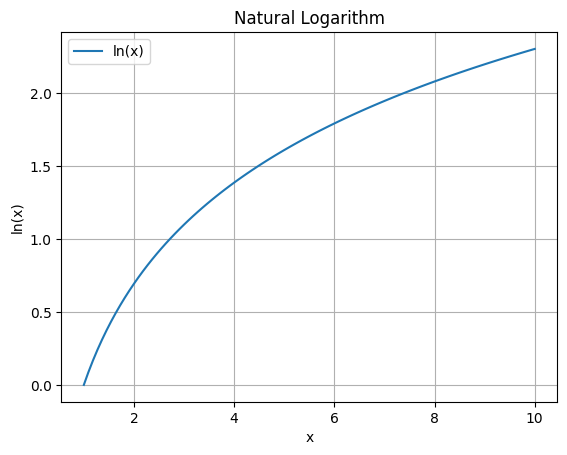

In [229]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x-values
x = np.linspace(1, 10, 100)  # Generate 100 equally spaced points between 1 and 10

# Calculate the y-values using natural logarithm
y = np.log(x)

# Plot the points
plt.plot(x, y, label='ln(x)')

# Add labels and title to the plot
plt.xlabel('x')
plt.ylabel('ln(x)')
plt.title('Natural Logarithm')

# Display the legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()






